In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
from math import exp
import seaborn as sns
from scipy import stats
from scipy.integrate import solve_ivp

In [216]:
#input dataset
all_covid= pd.read_csv("Datasets/all_covid_data.csv")
all_covid
all_covid= pd.read_csv("Datasets/all_covid_data.csv")
all_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148594,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148595,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148596,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148597,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [217]:
#filter out mexico
all_covid= all_covid.drop(["Country_code","WHO_region","New_cases","New_deaths","Cumulative_deaths"],axis= 1,inplace= False)
covid_mex= all_covid.iloc[:,1:3]
covid_mex= covid_mex[(covid_mex.Country == "Mexico")]
covid_mex

,Country,Cumulative_cases
84018,Mexico,0
84019,Mexico,0
84020,Mexico,0
84021,Mexico,0
84022,Mexico,0
...,...,...
84640,Mexico,3528972
84641,Mexico,3542189
84642,Mexico,3549229
84643,Mexico,3552983


In [218]:
#reset index
covid_mex.index= np.arange(1, len(covid_mex) +1)
covid_mex

,Country,Cumulative_cases
1,Mexico,0
2,Mexico,0
3,Mexico,0
4,Mexico,0
5,Mexico,0
...,...,...
623,Mexico,3528972
624,Mexico,3542189
625,Mexico,3549229
626,Mexico,3552983


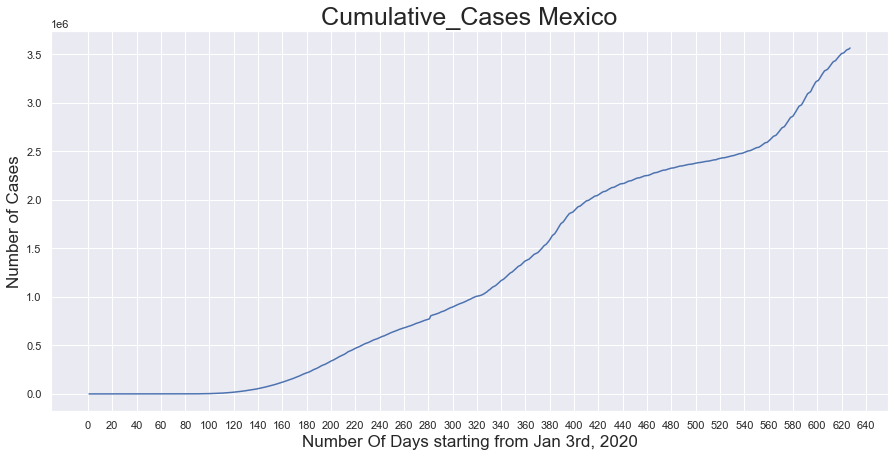

In [219]:
#ploting the cumulative cases
sns.set()
x= range(650)
plt.figure(figsize=(15,7))
plt.plot(covid_mex["Cumulative_cases"])
plt.xticks(np.arange(min(x),max(x)+1,20.0))
plt.xlabel("Number Of Days starting from Jan 3rd, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Cumulative_Cases Mexico", size= 25)
plt.show()

<ipython-input-220-14914eb72e59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mex100["Normalised_Cumulative"]= covid_mex100["Cumulative_cases"]/pop


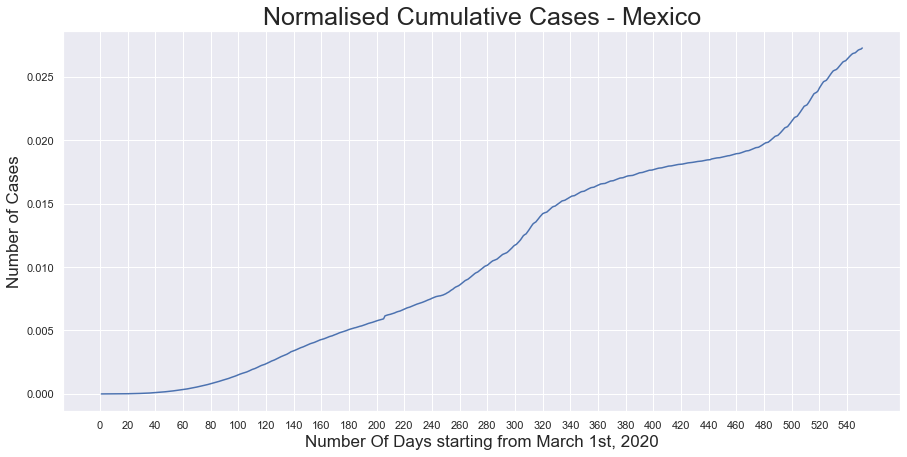

In [220]:
#Cumulative cases from 100
covid_mex100 = covid_mex[(covid_mex["Cumulative_cases"] >= 100)]
covid_mex100.index= np.arange(1, len(covid_mex100) +1)

#normalisng the data
pop= 130755187
covid_mex100["Normalised_Cumulative"]= covid_mex100["Cumulative_cases"]/pop

#ploting normalised data
x= range(560)
plt.figure(figsize=(15,7))
plt.plot(covid_mex100["Normalised_Cumulative"])
plt.xticks(np.arange(min(x),max(x)+1,20.0))
plt.xlabel("Number Of Days starting from March 1st, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Normalised Cumulative Cases - Mexico", size= 25)
plt.show()

<ipython-input-221-50d49641c4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mex100["log"]= covid_mex100["Normalised_Cumulative"].apply(lambda x: log(x))


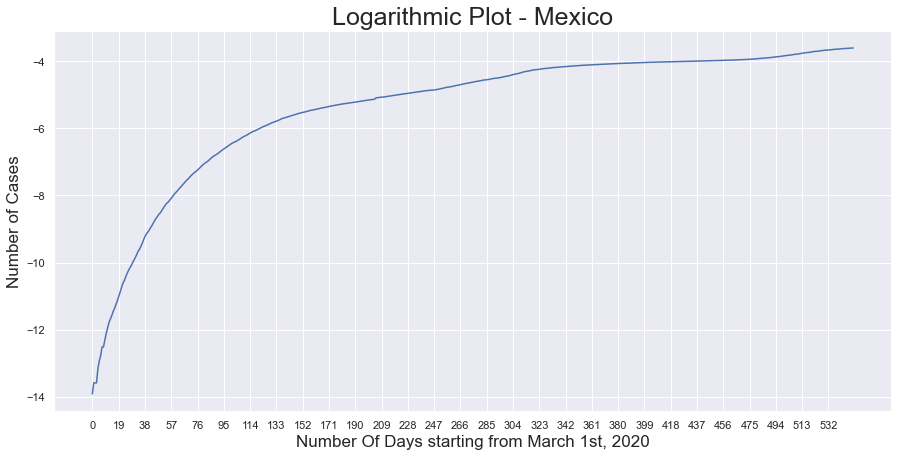

In [221]:
#log of normalised data
covid_mex100["log"]= covid_mex100["Normalised_Cumulative"].apply(lambda x: log(x))

#ploting the log data
x= range(551)
plt.figure(figsize=(15,7))
plt.plot(x, covid_mex100["log"])
plt.xticks(np.arange(min(x), max(x)+1, step= 19.0))
plt.xlabel("Number Of Days starting from March 1st, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Logarithmic Plot - Mexico", size= 25)
plt.show()

In [222]:
#getting Day column for coninience
covid_mex100["Day"]= np.arange(1, len(covid_mex100["Country"])+1)
covid_mex100

<ipython-input-222-a37069729d63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mex100["Day"]= np.arange(1, len(covid_mex100["Country"])+1)


,Country,Cumulative_cases,Normalised_Cumulative,log,Day
1,Mexico,118,9.024499e-07,-13.918153,1
2,Mexico,164,1.254252e-06,-13.588971,2
3,Mexico,164,1.254252e-06,-13.588971,3
4,Mexico,164,1.254252e-06,-13.588971,4
5,Mexico,251,1.919618e-06,-13.163384,5
...,...,...,...,...,...
547,Mexico,3528972,2.698915e-02,-3.612320,547
548,Mexico,3542189,2.709024e-02,-3.608582,548
549,Mexico,3549229,2.714408e-02,-3.606596,549
550,Mexico,3552983,2.717279e-02,-3.605539,550


In [223]:
linest= stats.linregress(covid_mex100["Day"][5:43],covid_mex100["log"][5:43])
Emr= linest.slope
Ema= linest.intercept

In [224]:
b=0.1
a= Emr + b
r0= 11/pop
i0= covid_mex100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.2042551388042182 8.412668172009115e-08 8.183231767317957e-07 0.9999990975501415


551

In [228]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_mex100['Day'].shape[0]]
day= covid_mex100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [235]:
mod


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 146
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 14

In [241]:
p= 1- mod.y[0]
p

array([9.02449859e-07, 1.07862323e-06, 1.27417853e-06, 1.49119918e-06,
       1.73203489e-06, 1.99933098e-06, 2.29602839e-06, 2.62536364e-06,
       2.99673863e-06, 3.52457940e-06, 4.22136592e-06, 5.05043817e-06,
       5.97964498e-06, 6.98134399e-06, 8.03240170e-06, 9.11419342e-06,
       1.02126033e-05, 1.13180244e-05, 1.24253584e-05, 1.35340162e-05,
       1.46479170e-05, 1.57754893e-05, 1.69296703e-05, 1.81279059e-05,
       1.93921509e-05, 2.07488691e-05, 2.22290329e-05, 2.38681237e-05,
       2.57061316e-05, 2.77875557e-05, 3.01614037e-05, 3.28811923e-05,
       3.60049471e-05, 3.95952024e-05, 4.37190013e-05, 4.84478960e-05,
       5.38579471e-05, 6.00297244e-05, 6.70483064e-05, 7.50032805e-05,
       8.39887427e-05, 9.41032983e-05, 1.05450061e-04, 1.18136653e-04,
       1.32275207e-04, 1.47982362e-04, 1.65379268e-04, 1.84591583e-04,
       2.05749474e-04, 2.28987616e-04, 2.54445194e-04, 2.82718014e-04,
       3.14397005e-04, 3.49513726e-04, 3.88205139e-04, 4.30715512e-04,
      

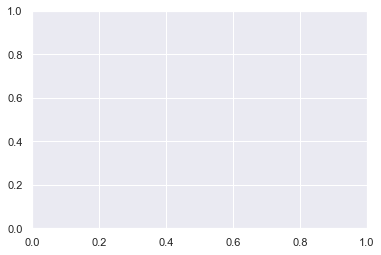

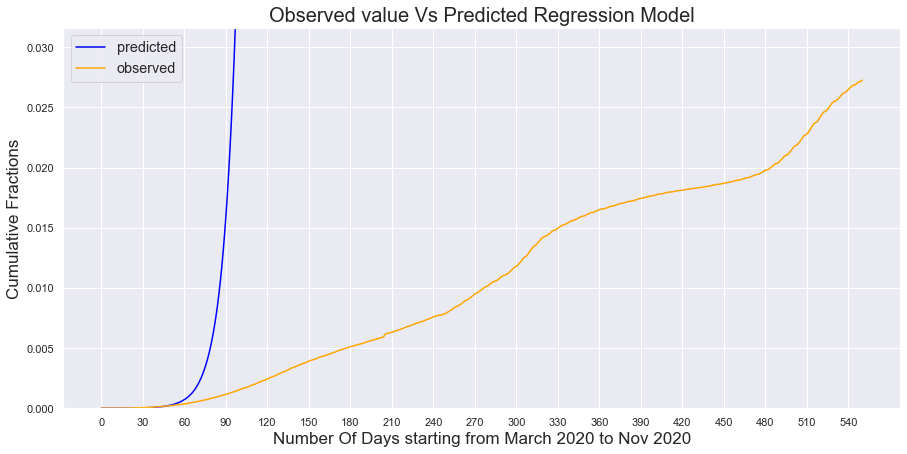

In [259]:
x= range(551)
scale_fact= 10**-1.5
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_mex100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


In [260]:
linest= stats.linregress(covid_mex100["Day"][43:60],covid_mex100["log"][43:60])
Emr= linest.slope
Ema= linest.intercept

In [261]:
b=0.1
a= Emr + b
r0= 11/pop
i0= covid_mex100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.15667462443961577 8.412668172009115e-08 8.183231767317957e-07 0.9999990975501415


In [262]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_mex100['Day'].shape[0]]
day= covid_mex100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [263]:
p= 1- mod.y[0]
p

array([9.02449859e-07, 1.03436320e-06, 1.17397072e-06, 1.32171787e-06,
       1.47807799e-06, 1.64355453e-06, 1.81868100e-06, 2.00402102e-06,
       2.20096101e-06, 2.42561042e-06, 2.68150875e-06, 2.96543527e-06,
       3.27444785e-06, 3.60588296e-06, 3.95735566e-06, 4.32675965e-06,
       4.71226720e-06, 5.11232918e-06, 5.52567508e-06, 5.95131298e-06,
       6.38852959e-06, 6.83689017e-06, 7.29623864e-06, 7.76669748e-06,
       8.24866779e-06, 8.74282928e-06, 9.25014025e-06, 9.77183759e-06,
       1.03094368e-05, 1.08647321e-05, 1.14397960e-05, 1.20369800e-05,
       1.26589139e-05, 1.33085064e-05, 1.39889444e-05, 1.47036937e-05,
       1.54564986e-05, 1.62513822e-05, 1.70926458e-05, 1.79848697e-05,
       1.89329126e-05, 1.99419118e-05, 2.10172833e-05, 2.21647216e-05,
       2.33901998e-05, 2.46999698e-05, 2.61005618e-05, 2.75987848e-05,
       2.92017265e-05, 3.09167528e-05, 3.27515087e-05, 3.47139174e-05,
       3.68121810e-05, 3.90547800e-05, 4.14504735e-05, 4.40082994e-05,
      

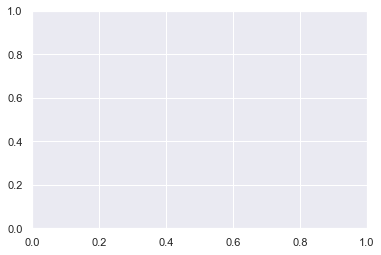

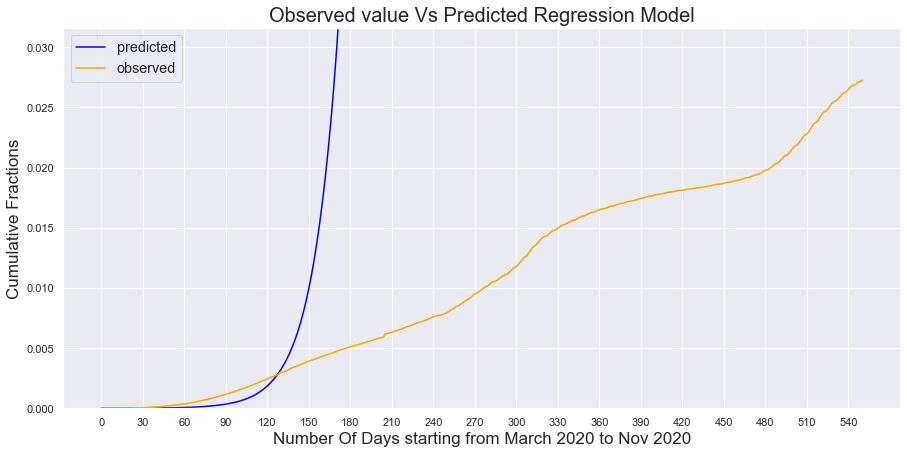

In [264]:
x= range(551)
scale_fact= 10**-1.5
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_mex100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


In [265]:
linest= stats.linregress(covid_mex100["Day"][43:115],covid_mex100["log"][43:115])
Emr= linest.slope
Ema= linest.intercept

In [266]:
b=0.1
a= Emr + b
r0= 11/pop
i0= covid_mex100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.13771656548777356 8.412668172009115e-08 8.183231767317957e-07 0.9999990975501415


In [267]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_mex100['Day'].shape[0]]
day= covid_mex100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [268]:
p= 1- mod.y[0]
p

array([9.02449859e-07, 1.01729868e-06, 1.13656233e-06, 1.26040991e-06,
       1.38901735e-06, 1.52256775e-06, 1.66125143e-06, 1.80526589e-06,
       1.95487848e-06, 2.11151447e-06, 2.27558616e-06, 2.44697740e-06,
       2.62560407e-06, 2.81141399e-06, 3.00438700e-06, 3.20453491e-06,
       3.41190152e-06, 3.62656264e-06, 3.84862603e-06, 4.07823146e-06,
       4.31555069e-06, 4.56078744e-06, 4.81417746e-06, 5.07598845e-06,
       5.34652012e-06, 5.62610415e-06, 5.91510423e-06, 6.21391600e-06,
       6.52296713e-06, 6.84271725e-06, 7.17365799e-06, 7.51631295e-06,
       7.87123775e-06, 8.23901995e-06, 8.62027914e-06, 9.01566688e-06,
       9.42586672e-06, 9.85159419e-06, 1.02935968e-05, 1.07526541e-05,
       1.12295775e-05, 1.17252106e-05, 1.22404288e-05, 1.27761396e-05,
       1.33332824e-05, 1.39128287e-05, 1.45157818e-05, 1.51431772e-05,
       1.57960823e-05, 1.64755965e-05, 1.71828511e-05, 1.79190094e-05,
       1.86852669e-05, 1.94828509e-05, 2.03130206e-05, 2.11770674e-05,
      

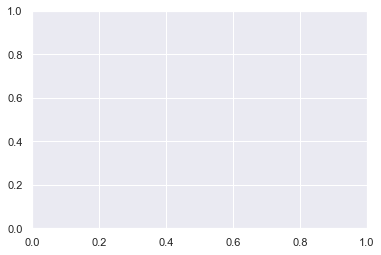

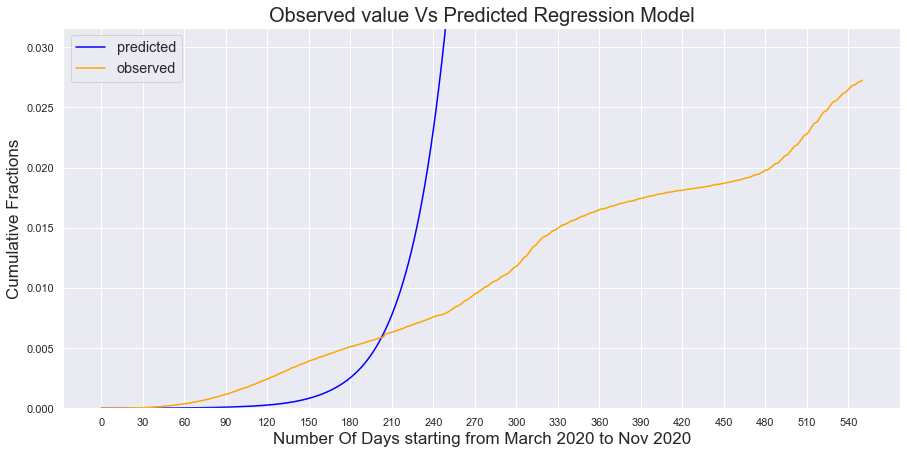

In [269]:
x= range(551)
scale_fact= 10**-1.5
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_mex100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


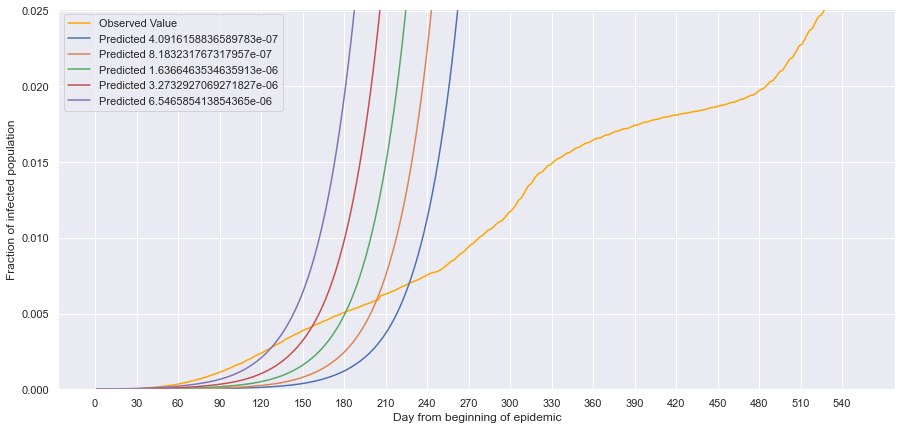

In [292]:
i00= i0 /2
scale_fact= 10**-1.6
plt.figure(figsize=(15,7))
plt.plot(covid_mex100["Normalised_Cumulative"],color='orange',label='Observed Value')
plt.ylim(ymin*scale_fact,ymax*scale_fact)
x= range(551)
plt.xticks(np.arange(min(x),max(x)+1,30.0))
for i in range(0,5):
    s0= 1- i00 -r0
    y0= [s0,r0]
    mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    p= 1- mod.y[0]
    plt.plot(covid_mex100['Day'], p, label = ('Predicted ' + str(i00)))
    plt.xlabel('Day from beginning of epidemic')
    plt.ylabel('Fraction of infected population')
    plt.legend()
    i00 = i00 * 2
plt.show()